<a href="https://colab.research.google.com/github/DanhOMO/ThongKeMayTinh/blob/main/diemthi_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("../data/diem_thi_thpt_2022.csv")
df

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.00,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.50,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.50,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.50,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.50,8.25
...,...,...,...,...,...,...,...,...,...,...
995436,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
995437,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
995438,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
995439,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


In [8]:
print(pd.concat([df.head(10), df.tail(10)]))

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0        1000001   3.6     5.00        4.0     NaN      NaN       NaN   
1        1000002   8.4     6.75        7.6     NaN      NaN       NaN   
2        1000003   5.8     7.50        5.0     NaN      NaN       NaN   
3        1000004   7.4     7.50        8.6     NaN      NaN       NaN   
4        1000005   7.2     8.50        9.0     NaN      NaN       NaN   
5        1000006   6.8     8.50        9.4     NaN      NaN       NaN   
6        1000007   7.2     6.00        5.0     NaN      NaN       NaN   
7        1000008   8.0     8.00        8.0     NaN      NaN       NaN   
8        1000009   2.6     5.25        NaN     NaN      NaN       NaN   
9        1000010   8.8     8.00        7.0     NaN      NaN       NaN   
995431  64006579   6.4     7.00        3.6     NaN      NaN       NaN   
995432  64006580   6.0     6.25        2.2     NaN      NaN       NaN   
995433  64006581   6.6     6.00        4.2     NaN 

In [10]:
df.shape

(995441, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995441 entries, 0 to 995440
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        995441 non-null  int64  
 1   toan       982726 non-null  float64
 2   ngu_van    981407 non-null  float64
 3   ngoai_ngu  870609 non-null  float64
 4   vat_li     325523 non-null  float64
 5   hoa_hoc    327367 non-null  float64
 6   sinh_hoc   322198 non-null  float64
 7   lich_su    659662 non-null  float64
 8   dia_li     657421 non-null  float64
 9   gdcd       554343 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 75.9 MB


In [16]:
print(df["ngu_van"].isnull().sum())
print(df["ngoai_ngu"].isnull().sum())

14034
124832


In [20]:
print(df["toan"].mean(numeric_only=True))
print(df["toan"].std(numeric_only=True))
print(df["toan"].max(numeric_only=True) - df["toan"].min(numeric_only=True))

6.466254072854491
1.6754353321403415
10.0


Số học sinh thi khối KHTN: 329235
Số học sinh thi khối KHXH: 660078


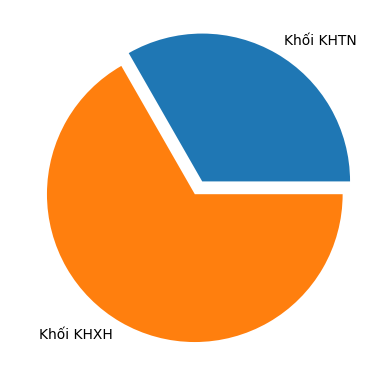

In [60]:
# Đếm số học sinh thi KHTN (có ít nhất một điểm ở Vật lý, Hóa học, Sinh học)
count_khtn = df[['vat_li', 'hoa_hoc', 'sinh_hoc']].notna().any(axis=1).sum()

# Đếm số học sinh thi KHXH (có ít nhất một điểm ở Lịch sử, Địa lý, GDCD)
count_khxh = df[['lich_su', 'dia_li', 'gdcd']].notna().any(axis=1).sum()

print(f"Số học sinh thi khối KHTN: {count_khtn}")
print(f"Số học sinh thi khối KHXH: {count_khxh}")

# Ve bieu do pie
import matplotlib.pyplot as plt
labels = ['Khối KHTN', 'Khối KHXH']
sizes = [count_khtn, count_khxh]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels)
plt.show()

In [70]:
print(df.sort_values(by ='toan', ascending=False).head(20))

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
793102  48011217  10.0     6.25        9.4    8.25     4.25      4.00   
15616    1015777  10.0     5.75        NaN    7.00     6.50      4.75   
466151  26017925  10.0     7.50        9.4    9.50     7.00      7.00   
102268   2005344  10.0     6.00        NaN    8.00     9.75      9.00   
499676  28020828  10.0     7.75        7.6    9.25     9.25      5.25   
294032  15000207  10.0     7.75        9.6    8.00     9.75      9.50   
475354  27006879  10.0     7.25        6.0    9.50     9.25      7.00   
139162   2042310  10.0     7.00        8.6    7.25    10.00      8.75   
17690    1017880  10.0     5.00        9.2    7.00     8.25      6.75   
558663  30005646  10.0     6.00        6.4    6.25     9.75      9.25   
149423   2052657  10.0     6.50        7.0    8.25     8.75      6.75   
520517  29004083  10.0     7.75        5.0    6.25     9.25      9.50   
506818  28028012  10.0     8.50        8.0    8.25 

In [67]:
print(df.sort_values(by ='toan', ascending=True).head(20))

             sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
19635    1019834   0.0     7.25        9.4     NaN      NaN       NaN   
506743  28027937   0.0      NaN        NaN     NaN      NaN       NaN   
871748  52009551   0.0     5.75        NaN     NaN      NaN       NaN   
680311  39009635   0.2      NaN        NaN     NaN     0.25      4.75   
809183  48027390   0.4     4.25        NaN     NaN      NaN       NaN   
625579  35005460   0.4     2.00        2.2     NaN      NaN       NaN   
278761  13004329   0.4     5.25        2.8     NaN      NaN       NaN   
522038  29005631   0.6     4.25        2.2     NaN      NaN       NaN   
687017  40005436   0.6     4.58        2.2     NaN      NaN       NaN   
404526  22008620   0.6     3.00        NaN     NaN      NaN       NaN   
692532  40010974   0.6     3.75        2.6     NaN      NaN       NaN   
786503  48004585   0.6     4.00        NaN     NaN      NaN       NaN   
289268  14006801   0.6     4.00        2.8     NaN 

In [73]:
 print((df["toan"] == 10).sum())

35


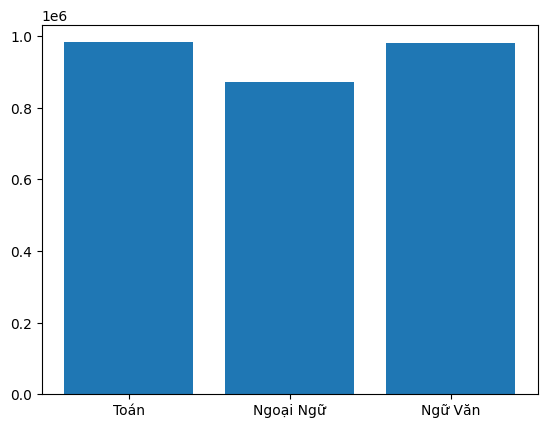

In [76]:
# Tao bieu do bar cho du lieu Toan , Ngoai ngu , ngu van
import matplotlib.pyplot as plt
toan = df["toan"].notna().sum()
ngoai_ngu = df["ngoai_ngu"].notna().sum()
ngu_van = df["ngu_van"].notna().sum()
plt.bar(["Toán", "Ngoại Ngữ", "Ngữ Văn"], [toan, ngoai_ngu, ngu_van] )
plt.show()
